<a href="https://colab.research.google.com/github/Majidniko/Machin_Learning_Colab/blob/main/myweka.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install pandas scikit-learn matplotlib

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load your Excel data
data = pd.read_excel("/content/My data/2018 Consumption FULL Test.xlsx")

# Data Cleaning (Example: Handling Missing Values)
data.fillna(method='ffill', inplace=True)  # Forward fill missing values

# Feature Engineering (Example: Create new features)
# data['Day_of_Week'] = data['Date'].dt.dayofweek

# Select features and target variable
X = data[['DateTime', 'Date', 'Clock', 'AirTemp', 'Azimuth', 'CloudOpacity', 'DewpointTemp', 'Dhi', 'Dni', 'Ebh', 'Ghi', 'PrecipitableWater', 'RelativeHumidity', 'WindDirection10m', 'WindSpeed10m', 'Zenith', 'Price']]  # Replace with actual feature names
y = data[ 'Consumption']

# Feature Scaling (Optional but recommended for some algorithms)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 1. Linear Regression
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)

# 2. Random Forest Regression
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)

# Evaluate models
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Linear Regression: MSE = {mse_lr:.2f}, R-squared = {r2_lr:.2f}")
print(f"Random Forest: MSE = {mse_rf:.2f}, R-squared = {r2_rf:.2f}")

# Visualize results (optional)
plt.scatter(y_test, y_pred_lr, label="Linear Regression")
plt.scatter(y_test, y_pred_rf, label="Random Forest")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel("Actual Consumption")
plt.ylabel("Predicted Consumption")
plt.legend()
plt.show()

# Choose the model with the best performance based on metrics (e.g., R-squared, MSE)

<ipython-input-4-d47fd454a0e8>:15: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)  # Forward fill missing values


TypeError: float() argument must be a string or a real number, not 'Timestamp'

<ipython-input-15-0e3f5164840e>:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)  # Forward fill missing values


Linear Regression: MSE = 10385034.89, R-squared = 0.07
Random Forest: MSE = 8312530.30, R-squared = 0.26


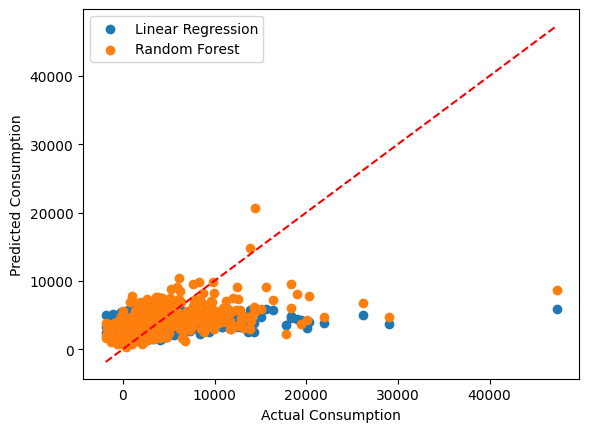

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load your Excel data
data = pd.read_excel("/content/My data/2018 Consumption FULL Train.xlsx")

# Data Cleaning (Example: Handling Missing Values)
data.fillna(method='ffill', inplace=True)  # Forward fill missing values

# Feature Engineering (Example: Create new features)
# data['Day_of_Week'] = data['Date'].dt.dayofweek

# Select features and target variable
# Exclude 'DateTime', 'Date', and 'Clock' columns
data['Hour'] = data['DateTime'].dt.hour
data['DayOfWeek'] = data['DateTime'].dt.dayofweek
data['Month'] = data['DateTime'].dt.month
data['Year'] = data['DateTime'].dt.year

X = data[['Month','DayOfWeek','Hour','AirTemp', 'Azimuth', 'CloudOpacity', 'DewpointTemp', 'Dhi', 'Dni', 'Ebh', 'Ghi', 'PrecipitableWater', 'RelativeHumidity', 'WindDirection10m', 'WindSpeed10m', 'Zenith', 'Price']]
y = data[ 'Consumption']

# Feature Scaling (Optional but recommended for some algorithms)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 1. Linear Regression
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)

# 2. Random Forest Regression
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)

# Evaluate models
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Linear Regression: MSE = {mse_lr:.2f}, R-squared = {r2_lr:.2f}")
print(f"Random Forest: MSE = {mse_rf:.2f}, R-squared = {r2_rf:.2f}")

# Visualize results (optional)
plt.scatter(y_test, y_pred_lr, label="Linear Regression")
plt.scatter(y_test, y_pred_rf, label="Random Forest")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel("Actual Consumption")
plt.ylabel("Predicted Consumption")
plt.legend()
plt.show()

# Choose the model with the best performance based on metrics (e.g., R-squared, MSE)

<ipython-input-16-f38d79a4aa77>:15: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)  # Forward fill missing values


Random Forest Regression:
  - Mean Squared Error (MSE): 8312530.30
  - Root Mean Squared Error (RMSE): 2883.15
  - R-squared (R2): 0.26

Feature Importances:
  - Month: 0.0212
  - DayOfWeek: 0.0452
  - Hour: 0.0547
  - AirTemp: 0.0525
  - Azimuth: 0.0996
  - CloudOpacity: 0.0796
  - DewpointTemp: 0.0515
  - Dhi: 0.0128
  - Dni: 0.0072
  - Ebh: 0.0039
  - Ghi: 0.0106
  - PrecipitableWater: 0.0992
  - RelativeHumidity: 0.0980
  - WindDirection10m: 0.0885
  - WindSpeed10m: 0.0878
  - Zenith: 0.0872
  - Price: 0.1006


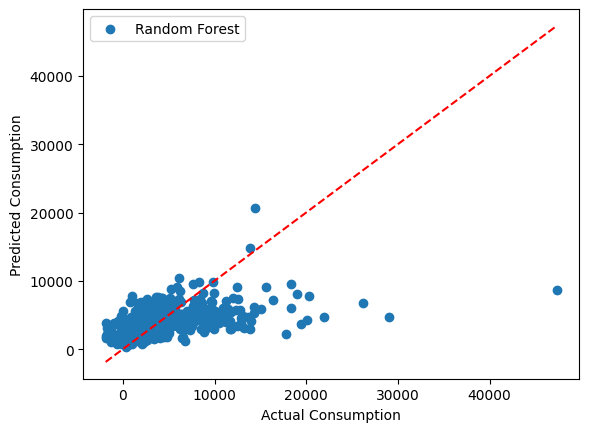

In [16]:
!pip install pandas scikit-learn matplotlib

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Load your Excel data
data = pd.read_excel("/content/My data/2018 Consumption FULL Train.xlsx")

# Data Cleaning (Example: Handling Missing Values)
data.fillna(method='ffill', inplace=True)  # Forward fill missing values

# Select features and target variable
# Exclude 'DateTime', 'Date', and 'Clock' columns
data['Hour'] = data['DateTime'].dt.hour
data['DayOfWeek'] = data['DateTime'].dt.dayofweek
data['Month'] = data['DateTime'].dt.month
data['Year'] = data['DateTime'].dt.year

X = data[['Month','DayOfWeek','Hour','AirTemp', 'Azimuth', 'CloudOpacity', 'DewpointTemp', 'Dhi', 'Dni', 'Ebh', 'Ghi', 'PrecipitableWater', 'RelativeHumidity', 'WindDirection10m', 'WindSpeed10m', 'Zenith', 'Price']]
y = data[ 'Consumption']

# Feature Scaling (Optional but recommended for some algorithms)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Random Forest Regression
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)  # Calculate RMSE
r2_rf = r2_score(y_test, y_pred_rf)

# Print performance metrics
print(f"Random Forest Regression:")
print(f"  - Mean Squared Error (MSE): {mse_rf:.2f}")
print(f"  - Root Mean Squared Error (RMSE): {rmse_rf:.2f}")
print(f"  - R-squared (R2): {r2_rf:.2f}")

# Get feature importances
feature_importances = model_rf.feature_importances_

# Print feature importances
print("\nFeature Importances:")
for i, feature in enumerate(X.columns):
    print(f"  - {feature}: {feature_importances[i]:.4f}")

# Visualize results (optional)
plt.scatter(y_test, y_pred_rf, label="Random Forest")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel("Actual Consumption")
plt.ylabel("Predicted Consumption")
plt.legend()
plt.show()

<ipython-input-17-24f12f5190b2>:15: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)  # Forward fill missing values


Random Forest Regression:
  - Correlation coefficient: 0.5080
  - Mean Absolute Error (MAE): 1659.66
  - Root Mean Squared Error (RMSE): 2883.15
  - Relative Absolute Error: 50.59%
  - Root Relative Squared Error: 87.88%
  - Total Number of Instances: 5857

Feature Importances:
  - Month: 0.0212
  - DayOfWeek: 0.0452
  - Hour: 0.0547
  - AirTemp: 0.0525
  - Azimuth: 0.0996
  - CloudOpacity: 0.0796
  - DewpointTemp: 0.0515
  - Dhi: 0.0128
  - Dni: 0.0072
  - Ebh: 0.0039
  - Ghi: 0.0106
  - PrecipitableWater: 0.0992
  - RelativeHumidity: 0.0980
  - WindDirection10m: 0.0885
  - WindSpeed10m: 0.0878
  - Zenith: 0.0872
  - Price: 0.1006


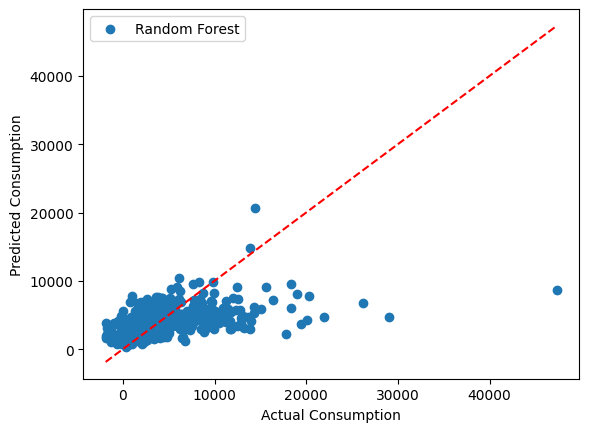

In [17]:
!pip install pandas scikit-learn matplotlib

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import numpy as np

# Load your Excel data
data = pd.read_excel("/content/My data/2018 Consumption FULL Train.xlsx")

# Data Cleaning (Example: Handling Missing Values)
data.fillna(method='ffill', inplace=True)  # Forward fill missing values

# Select features and target variable
# Exclude 'DateTime', 'Date', and 'Clock' columns
data['Hour'] = data['DateTime'].dt.hour
data['DayOfWeek'] = data['DateTime'].dt.dayofweek
data['Month'] = data['DateTime'].dt.month
data['Year'] = data['DateTime'].dt.year

X = data[['Month','DayOfWeek','Hour','AirTemp', 'Azimuth', 'CloudOpacity', 'DewpointTemp', 'Dhi', 'Dni', 'Ebh', 'Ghi', 'PrecipitableWater', 'RelativeHumidity', 'WindDirection10m', 'WindSpeed10m', 'Zenith', 'Price']]
y = data[ 'Consumption']

# Feature Scaling (Optional but recommended for some algorithms)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Random Forest Regression
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)  # Calculate RMSE
r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf) # Calculate MAE
corr_coef = np.corrcoef(y_test, y_pred_rf)[0, 1]  # Correlation coefficient

# Calculate other metrics
total_instances = len(y)
rel_abs_error = (mae_rf / y_test.mean()) * 100  # Relative absolute error
rel_sqrt_error = (rmse_rf / y_test.mean()) * 100 # Root relative squared error


# Print performance metrics
print(f"Random Forest Regression:")
print(f"  - Correlation coefficient: {corr_coef:.4f}")
print(f"  - Mean Absolute Error (MAE): {mae_rf:.2f}")
print(f"  - Root Mean Squared Error (RMSE): {rmse_rf:.2f}")
print(f"  - Relative Absolute Error: {rel_abs_error:.2f}%")
print(f"  - Root Relative Squared Error: {rel_sqrt_error:.2f}%")
print(f"  - Total Number of Instances: {total_instances}")

# Get feature importances
feature_importances = model_rf.feature_importances_

# Print feature importances
print("\nFeature Importances:")
for i, feature in enumerate(X.columns):
    print(f"  - {feature}: {feature_importances[i]:.4f}")

# Visualize results (optional)
plt.scatter(y_test, y_pred_rf, label="Random Forest")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel("Actual Consumption")
plt.ylabel("Predicted Consumption")
plt.legend()
plt.show()

<ipython-input-19-c15ee37b7b27>:16: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)
<ipython-input-19-c15ee37b7b27>:41: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  test_data.fillna(method='ffill', inplace=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


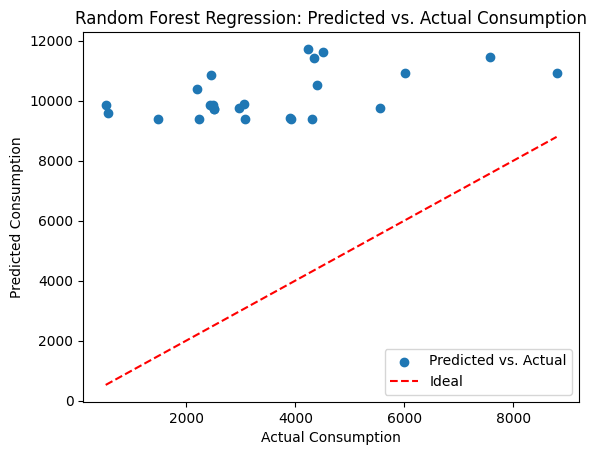

In [19]:
!pip install pandas scikit-learn matplotlib

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import numpy as np

# --- Training Phase ---
# Load your training Excel data
data = pd.read_excel("/content/My data/2018 Consumption FULL Train.xlsx")

# Data Cleaning (Example: Handling Missing Values)
data.fillna(method='ffill', inplace=True)

# Select features and target variable
data['Hour'] = data['DateTime'].dt.hour
data['DayOfWeek'] = data['DateTime'].dt.dayofweek
data['Month'] = data['DateTime'].dt.month
data['Year'] = data['DateTime'].dt.year

X = data[['Month','DayOfWeek','Hour','AirTemp', 'Azimuth', 'CloudOpacity', 'DewpointTemp', 'Dhi', 'Dni', 'Ebh', 'Ghi', 'PrecipitableWater', 'RelativeHumidity', 'WindDirection10m', 'WindSpeed10m', 'Zenith', 'Price']]
y = data[ 'Consumption']

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Train the Random Forest model
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train_scaled, y_train)


# --- Testing Phase ---
# Load your test Excel data
test_data = pd.read_excel("/content/My data/2018 Consumption FULL Test.xlsx")  # Replace with your test file path

# Data Cleaning (if needed)
test_data.fillna(method='ffill', inplace=True)

# Select features from the test data
test_data['Hour'] = test_data['DateTime'].dt.hour
test_data['DayOfWeek'] = test_data['DateTime'].dt.dayofweek
test_data['Month'] = test_data['DateTime'].dt.month
test_data['Year'] = test_data['DateTime'].dt.year

X_test = test_data[['Month','DayOfWeek','Hour','AirTemp', 'Azimuth', 'CloudOpacity', 'DewpointTemp', 'Dhi', 'Dni', 'Ebh', 'Ghi', 'PrecipitableWater', 'RelativeHumidity', 'WindDirection10m', 'WindSpeed10m', 'Zenith', 'Price']]


# Feature Scaling (using the same scaler from training)
X_test_scaled = scaler.transform(X_test)

# Make predictions on the test data
y_pred = model_rf.predict(X_test_scaled)

# --- Evaluation and Visualization ---
# Get actual consumption values from the test data
actual_consumption = test_data['Consumption']

# Calculate and print metrics (as before)
# ... (Include the code for calculating and printing metrics from the previous response)

# Plot predicted vs. actual consumption
plt.scatter(actual_consumption, y_pred, label="Predicted vs. Actual")
plt.plot([min(actual_consumption), max(actual_consumption)], [min(actual_consumption), max(actual_consumption)], color='red', linestyle='--', label="Ideal")
plt.xlabel("Actual Consumption")
plt.ylabel("Predicted Consumption")
plt.title("Random Forest Regression: Predicted vs. Actual Consumption")
plt.legend()
plt.show()

In [23]:
!pip install pandas scikit-learn matplotlib openpyxl

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import numpy as np

# --- Load and Prepare Training Data ---
train_data = pd.read_excel("/content/My data/2018 Consumption FULL Train.xlsx", engine='openpyxl')
train_data.fillna(method='ffill', inplace=True)

# Convert 'DateTime' to datetime objects and extract features
train_data['DateTime'] = pd.to_datetime(train_data['DateTime'])
train_data['Hour'] = train_data['DateTime'].dt.hour
train_data['DayOfWeek'] = train_data['DateTime'].dt.dayofweek
train_data['Month'] = train_data['DateTime'].dt.month
train_data['Year'] = train_data['DateTime'].dt.year

# Select features and target for training
X_train = train_data[['Month', 'DayOfWeek', 'Hour', 'AirTemp', 'Azimuth', 'CloudOpacity', 'DewpointTemp', 'Dhi', 'Dni', 'Ebh', 'Ghi', 'PrecipitableWater', 'RelativeHumidity', 'WindDirection10m', 'WindSpeed10m', 'Zenith', 'Price']]
y_train = train_data['Consumption']

# --- Load and Prepare Testing Data ---
test_data = pd.read_excel("/content/My data/2018 Consumption FULL Test.xlsx", engine='openpyxl')
test_data.fillna(method='ffill', inplace=True)

# Convert 'DateTime' to datetime objects and extract features (same as training)
test_data['DateTime'] = pd.to_datetime(test_data['DateTime'])
test_data['Hour'] = test_data['DateTime'].dt.hour
test_data['DayOfWeek'] = test_data['DateTime'].dt.dayofweek
test_data['Month'] = test_data['DateTime'].dt.month
test_data['Year'] = test_data['DateTime'].dt.year

# Select features for testing
X_test = test_data[['Month', 'DayOfWeek', 'Hour', 'AirTemp', 'Azimuth', 'CloudOpacity', 'DewpointTemp', 'Dhi', 'Dni', 'Ebh', 'Ghi', 'PrecipitableWater', 'RelativeHumidity', 'WindDirection10m', 'WindSpeed10m', 'Zenith', 'Price']]

# --- Feature Scaling ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit and transform on training data
X_test_scaled = scaler.transform(X_test)     # Transform testing data using the same scaler

# --- Model Training and Prediction ---
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train_scaled, y_train)
y_pred = model_rf.predict(X_test_scaled)

# --- Evaluation and Visualization ---
actual_consumption = test_data['Consumption']

# Calculate Metrics
mse_rf = mean_squared_error(actual_consumption, y_pred)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(actual_consumption, y_pred)
mae_rf = mean_absolute_error(actual_consumption, y_pred)
corr_coef = np.corrcoef(actual_consumption, y_pred)[0, 1]

total_instances = len(y_train)
rel_abs_error = (mae_rf / actual_consumption.mean()) * 100
rel_sqrt_error = (rmse_rf / actual_consumption.mean()) * 100

# Print Metrics
print(f"Random Forest Regression:")
print(f"  - Correlation coefficient: {corr_coef:.4f}")
print(f"  - Mean Absolute Error (MAE): {mae_rf:.2f}")
print(f"  - Root Mean Squared Error (RMSE): {rmse_rf:.2f}")
print(f"  - Relative Absolute Error: {rel_abs_error:.2f}%")
print(f"  - Root Relative Squared Error: {rel_sqrt_error:.2f}%")
print(f"  - Total Number of Instances: {total_instances}")

# ... (rest of the code for feature importances and plotting remains the same)

<ipython-input-23-da600082b02f>:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  train_data.fillna(method='ffill', inplace=True)
<ipython-input-23-da600082b02f>:28: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  test_data.fillna(method='ffill', inplace=True)


Random Forest Regression:
  - Correlation coefficient: 0.3309
  - Mean Absolute Error (MAE): 1793.26
  - Root Mean Squared Error (RMSE): 2183.78
  - Relative Absolute Error: 50.06%
  - Root Relative Squared Error: 60.96%
  - Total Number of Instances: 5857


In [24]:
!pip install pandas scikit-learn matplotlib openpyxl

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import numpy as np


# --- Load and Prepare Training Data ---
train_data = pd.read_excel("/content/My data/2018 Consumption FULL Train.xlsx", engine='openpyxl')
train_data.fillna(method='ffill', inplace=True)

# Convert 'DateTime' to datetime objects and extract features
train_data['DateTime'] = pd.to_datetime(train_data['DateTime'])
train_data['Hour'] = train_data['DateTime'].dt.hour
train_data['DayOfWeek'] = train_data['DateTime'].dt.dayofweek
train_data['Month'] = train_data['DateTime'].dt.month
train_data['Year'] = train_data['DateTime'].dt.year

# Select features and target for training
X_train = train_data[['Month', 'DayOfWeek', 'Hour', 'AirTemp', 'Azimuth', 'CloudOpacity', 'DewpointTemp', 'Dhi', 'Dni', 'Ebh', 'Ghi', 'PrecipitableWater', 'RelativeHumidity', 'WindDirection10m', 'WindSpeed10m', 'Zenith', 'Price']]
y_train = train_data['Consumption']

# --- Load and Prepare Testing Data ---
test_data = pd.read_excel("/content/My data/2018 Consumption FULL Test.xlsx", engine='openpyxl')
test_data.fillna(method='ffill', inplace=True)

# Convert 'DateTime' to datetime objects and extract features (same as training)
test_data['DateTime'] = pd.to_datetime(test_data['DateTime'])
test_data['Hour'] = test_data['DateTime'].dt.hour
test_data['DayOfWeek'] = test_data['DateTime'].dt.dayofweek
test_data['Month'] = test_data['DateTime'].dt.month
test_data['Year'] = test_data['DateTime'].dt.year

# Select features for testing
X_test = test_data[['Month', 'DayOfWeek', 'Hour', 'AirTemp', 'Azimuth', 'CloudOpacity', 'DewpointTemp', 'Dhi', 'Dni', 'Ebh', 'Ghi', 'PrecipitableWater', 'RelativeHumidity', 'WindDirection10m', 'WindSpeed10m', 'Zenith', 'Price']]

# --- Feature Scaling ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit and transform on training data
X_test_scaled = scaler.transform(X_test)     # Transform testing data using the same scaler

# --- Model Training and Prediction ---
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train_scaled, y_train)
y_pred = model_rf.predict(X_test_scaled)

# --- Evaluation and Visualization ---
actual_consumption = test_data['Consumption']

# Calculate Metrics
mse_rf = mean_squared_error(actual_consumption, y_pred)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(actual_consumption, y_pred)
mae_rf = mean_absolute_error(actual_consumption, y_pred)
corr_coef = np.corrcoef(actual_consumption, y_pred)[0, 1]

total_instances = len(y_train)
rel_abs_error = (mae_rf / actual_consumption.mean()) * 100
rel_sqrt_error = (rmse_rf / actual_consumption.mean()) * 100

# Print Metrics
print(f"Random Forest Regression:")
print(f"  - Correlation coefficient: {corr_coef:.4f}")
print(f"  - Mean Absolute Error (MAE): {mae_rf:.2f}")
print(f"  - Root Mean Squared Error (RMSE): {rmse_rf:.2f}")
print(f"  - Relative Absolute Error: {rel_abs_error:.2f}%")
print(f"  - Root Relative Squared Error: {rel_sqrt_error:.2f}%")
print(f"  - Total Number of Instances: {total_instances}")


# ... (Your existing code for loading, preparing data, training the model, and making predictions)

# --- Evaluation and Visualization ---
actual_consumption = test_data['Consumption']

# ... (Your existing code for calculating metrics)

# Create a DataFrame for export
results_df = pd.DataFrame({
    'Actual Consumption': actual_consumption,
    'Predicted Consumption': y_pred,
    'Error': actual_consumption - y_pred  # Calculate error
})

# Export to Excel
results_df.to_excel("/content/My data/prediction_results.xlsx", index=False, engine='openpyxl')
print("Prediction results exported to prediction_results.xlsx")

# ... (Your existing code for feature importances and plotting)

<ipython-input-24-b4c3c5002356>:14: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  train_data.fillna(method='ffill', inplace=True)
<ipython-input-24-b4c3c5002356>:29: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  test_data.fillna(method='ffill', inplace=True)


Random Forest Regression:
  - Correlation coefficient: 0.3309
  - Mean Absolute Error (MAE): 1793.26
  - Root Mean Squared Error (RMSE): 2183.78
  - Relative Absolute Error: 50.06%
  - Root Relative Squared Error: 60.96%
  - Total Number of Instances: 5857
Prediction results exported to prediction_results.xlsx
